# Real Estate Price Predictor

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
from joblib import dump

## Reading Data

In [2]:
housing = pd.read_csv(r"C:\Users\alexh\OneDrive\Documents\ML\Project\Real Estate Price Predictor\data.csv")

## Analysing Data

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#housing.shape
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       496 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,496.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286562,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702493,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plot Data

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

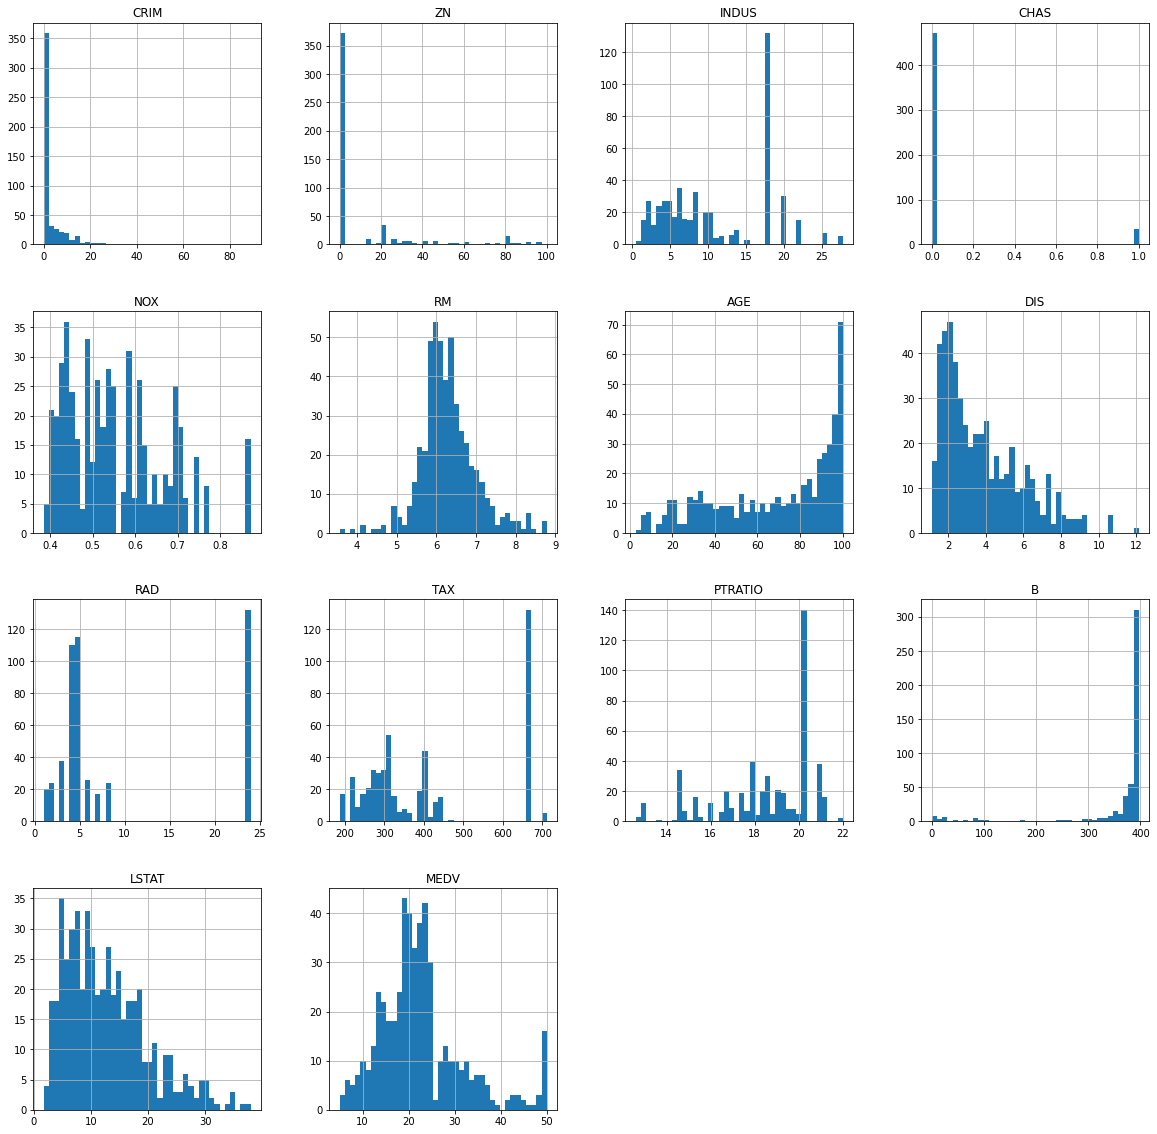

In [7]:
housing.hist(bins = 40,figsize = (20,20))

## Train Test Splitting

### SKLearn

In [8]:
#from sklearn.model_selection import train_test_split

#train,test = train_test_split(housing,test_size = 0.2,random_state = 42)

#train['CHAS'].value_counts()

### Stratified Splitting

In [9]:
#from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    train = housing.loc[train_index]
    test = housing.loc[test_index]

In [10]:
train["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## Looking for Correlation

In [11]:
corr_matrix = train.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.676010
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

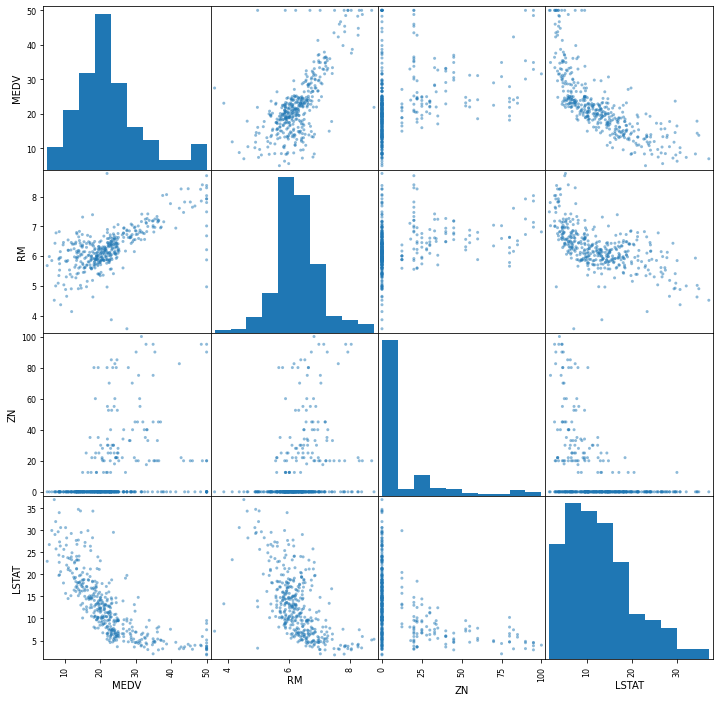

In [12]:
attributes = ['MEDV','RM','ZN','LSTAT']     #features of strong correlation wrt each other
pd.plotting.scatter_matrix(train[attributes], figsize = (12,12))

<AxesSubplot:>

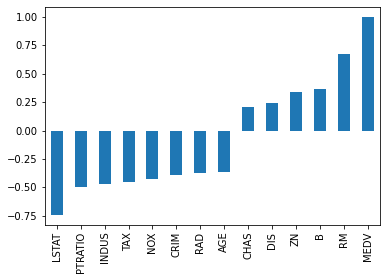

In [13]:
corr = pd.Series(corr_matrix["MEDV"],train.columns).sort_values()
corr.plot(kind = 'bar')

### Looking Attributes Combinations

In [14]:
#train['TAXRM'] = train['TAX'] / train['RM']
#(train.corr())['MEDV'].sort_values()

## Handling Missing Data

In [15]:
#from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
imputer.fit(train)
X = imputer.transform(train)
train_tr = pd.DataFrame(X,columns = train.columns)

## Feature Scaling

In [16]:
#from sklearn.preprocessing import StandardScaler

X_train_tr = train_tr.drop('MEDV', axis = 1)
#Y_train_tr = train_tr.MEDV

standard_scaler = StandardScaler()
train_tr_sc = standard_scaler.fit_transform(X_train_tr)
#train_tr_sc = pd.DataFrame(X, columns = X_train_tr.columns)

## Pipelining

In [17]:
#from sklearn.pipeline import Pipeline

my_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')), ('std_scaler',StandardScaler())])
my_pipeline.fit_transform(train.drop("MEDV", axis = 1))

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting ML Model 

In [18]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = LinearRegression()

X_train = train_tr_sc
Y_train = train_tr.MEDV

model.fit(X_train,Y_train)

RandomForestRegressor()

#### Test on some Data

In [19]:
some_data = (train.drop('MEDV', axis = 1)).iloc[:5]
some_label = (train.MEDV).iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.628, 25.311, 16.434, 23.347, 23.473])

In [20]:
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating the Model

In [21]:
#from sklearn.metrics import mean_squared_error

housing_prediction = model.predict(X_train)
mse = mean_squared_error(housing_prediction, Y_train)
rmse = np.sqrt(mse)
rmse

1.2701056584644306

### using better validation technique - Cross Validator

In [22]:
#from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.93790517, 2.64366809, 4.47658264, 2.32809827, 3.05254563,
       2.80863035, 4.32911556, 3.40194389, 2.84625724, 4.79424937])

In [23]:
def print_scores(scores):
    print('Scores : ',scores)
    print('Mean : ',scores.mean())
    print('Standard Deviation : ',scores.std())

In [24]:
print_scores(rmse_scores)

Scores :  [2.93790517 2.64366809 4.47658264 2.32809827 3.05254563 2.80863035
 4.32911556 3.40194389 2.84625724 4.79424937]
Mean :  3.361899620179474
Standard Deviation :  0.8162916851466421


## Saving the Model

In [25]:
#from joblib import dump

dump(model, 'Real Estate.joblib')

['Real Estate.joblib']

## Testing on Test Data

In [26]:
X_test = test.drop('MEDV', axis=1)
Y_test = test.MEDV

X_test_prep = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prep)

test_rmse = np.sqrt(mean_squared_error(final_predictions, Y_test))
test_rmse

2.8910510335224746